In [189]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

df = pd.read_csv('./ESX01_0606.csv', sep='\n', header=0, delimiter=";",decimal=',')
df.columns =['Time','CPU','MEM','REC', 'TRAN']
df.head()

,Time,CPU,MEM,REC,TRAN
0,2019-06-06T00:00:00+02:00,15407000000,2.290000e+11,20417536.0,20557824.0
1,2019-06-06T00:01:00+02:00,23226000000,2.290000e+11,24104960.0,23638016.0
2,2019-06-06T00:02:00+02:00,23226000000,2.290000e+11,23094272.0,22553600.0
3,2019-06-06T00:03:00+02:00,11886000000,2.290000e+11,16806912.0,16589824.0
4,2019-06-06T00:04:00+02:00,14181000000,2.290000e+11,16806912.0,16589824.0


In [190]:
df.shape

(1440, 5)

In [191]:
#data.columns =['Time','CPU']
float('2,29E+11'.replace(',','.'))
#data['MEM'] = data['MEM'].astype('float64')

229000000000.0

In [192]:
float(df.iloc[1,2])

229000000000.0

In [193]:
df.dtypes

Time     object
CPU       int64
MEM     float64
REC     float64
TRAN    float64
dtype: object

In [194]:
df.describe()

,CPU,MEM,REC,TRAN
count,1.440000e+03,1.440000e+03,1.428000e+03,1.428000e+03
mean,1.410993e+10,2.275229e+11,1.507880e+07,1.920956e+07
std,3.672033e+09,1.827373e+09,9.631653e+06,1.191184e+07
min,4.962000e+09,2.250000e+11,4.986880e+05,1.945600e+05
25%,1.130750e+10,2.250000e+11,5.763072e+06,1.070182e+07
50%,1.449550e+10,2.290000e+11,1.488794e+07,1.919539e+07
75%,1.670425e+10,2.290000e+11,2.294400e+07,2.582016e+07
max,2.454200e+10,2.290000e+11,3.920794e+07,7.917773e+07


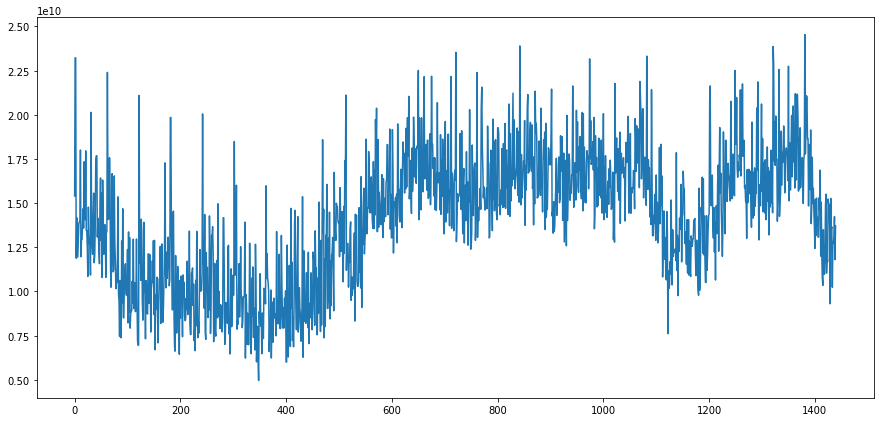

In [195]:
plt.figure(figsize=(15,7))
plt.plot(data.CPU)
#plt.grid(True)
plt.show()

In [196]:
df = df.dropna()
df.shape

(1428, 5)

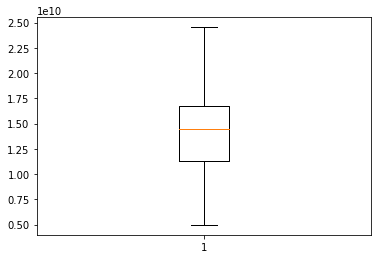

In [197]:
plt.boxplot(data.CPU)
plt.show()

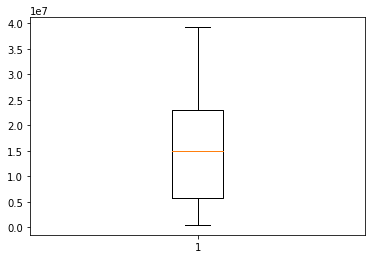

In [199]:
plt.boxplot(df.REC)
plt.show()

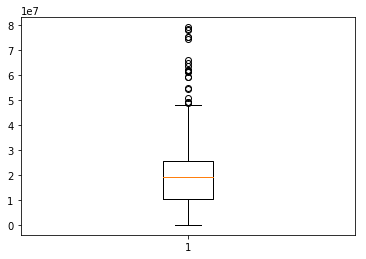

In [201]:
plt.boxplot(df.TRAN)
plt.show()

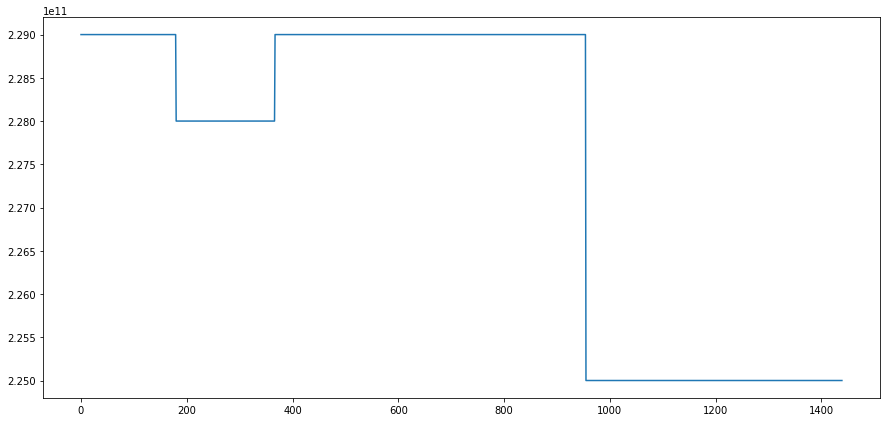

In [175]:
plt.figure(figsize=(15,7))
plt.plot(data.MEM)
#plt.grid(True)
plt.show()

In [176]:
DROP_VARIABLES = ['Time', 'MEM']
df = df.drop(DROP_VARIABLES, axis=1)
df.shape

(1428, 3)

In [177]:
df.head()

,CPU,REC,TRAN
0,15407000000,20417536.0,20557824.0
1,23226000000,24104960.0,23638016.0
2,23226000000,23094272.0,22553600.0
3,11886000000,16806912.0,16589824.0
4,14181000000,16806912.0,16589824.0


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Text(0.5, 0, 'time')

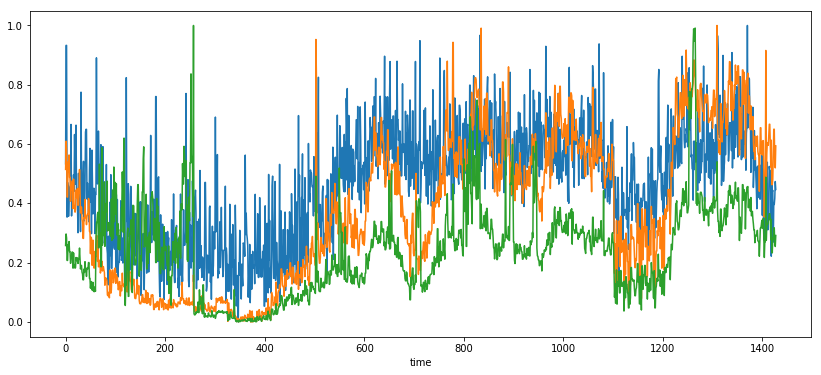

In [178]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df)
df_norm = scaler.transform(df)
plt.figure(figsize=(14,6))
plt.plot(df_norm)
plt.xlabel('time')


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'time')

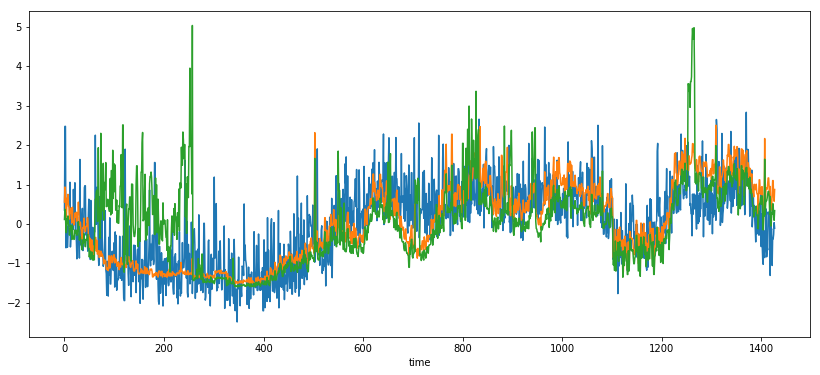

In [185]:
scaler_std = StandardScaler()
scaler_std.fit(df)
df_std = scaler_std.transform(df)
plt.figure(figsize=(14,6))
plt.plot(df_std)
plt.xlabel('time')

In [180]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# Données brutes normées avec MinMaxScaler
onesvm = OneClassSVM()
onesvm.fit(df_norm)
detection_a = onesvm.predict(df_norm)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_a) if x == -1])

#Données brutes normées avec StandardScaler
onesvm = OneClassSVM()
onesvm.fit(df_std)
detection_std = onesvm.predict(df_std)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_std) if x == -1])

In [186]:
#Données brutes normées avec Min MaxScaler
isforest = IsolationForest()
isforest.fit(df_norm)
detection_a = isforest.predict(df_norm)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_a) if x == -1])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Anomalous time series are  [2, 3, 63, 69, 74, 79, 84, 93, 95, 96, 98, 100, 101, 102, 103, 115, 116, 118, 119, 121, 122, 123, 138, 145, 156, 157, 158, 159, 172, 182, 183, 190, 191, 199, 229, 231, 234, 235, 236, 239, 240, 241, 242, 243, 248, 249, 251, 252, 253, 254, 255, 256, 258, 294, 302, 306, 323, 344, 345, 347, 348, 354, 362, 368, 372, 382, 400, 401, 404, 432, 469, 504, 509, 551, 642, 667, 693, 704, 713, 753, 779, 780, 802, 808, 811, 812, 813, 814, 819, 821, 823, 828, 832, 833, 834, 836, 885, 894, 897, 898, 899, 941, 946, 947, 966, 1013, 1060, 1061, 1073, 1082, 1193, 1240, 1248, 1250, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1283, 1310, 1311, 1312, 1322, 1340, 1349, 1353, 1362, 1371, 1374, 1375, 1404, 1408, 1419]


In [187]:
#Données brutes normées avec Min MaxScaler
isforest = IsolationForest()
isforest.fit(df_std)
detection_std = isforest.predict(df_norm)
print("Anomalous time series are ", [i+1 for i,x in enumerate(detection_std) if x == -1])

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Anomalous time series are  []


## Extract every files from direction:

In [7]:
import os
for filename in os.listdir(os.getcwd()):
    print(filename, end=' ')

 ESX01_0606_VM_CPU.csv ESX01_0606_VM_MEM.csv ESX01_0606_MEM.csv ESX01_0606_CPU.csv data_extract.ipynb ESX01_0606_REC.csv .dropbox ESX01_0606_VM.csv .ipynb_checkpoints 

In [8]:
count=0
for filename in os.listdir(os.getcwd()):
    if 'csv' in filename:
        count+=1
        
print('number of data csv=',count)

number of data csv= 7


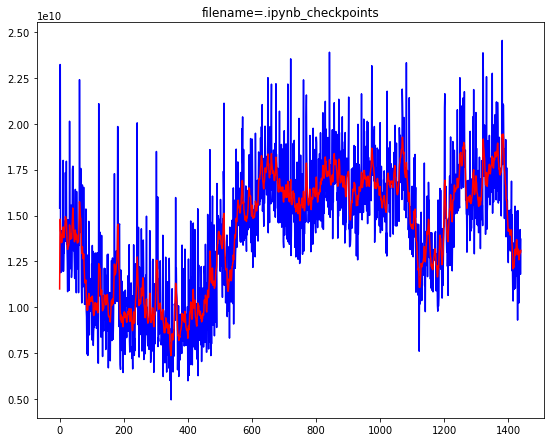

In [9]:
list_cpu_file = [filename for filename in os.listdir(os.getcwd()) if 'CPU' in filename and 'VM' not in filename]
plt.figure(figsize=(20,16))
for index, file in enumerate(list_cpu_file):
    data = pd.read_csv(file, delimiter=';', header=0)
    data.columns = ['time', 'CPU']
    measurements = data.CPU
    kf = KalmanFilter()
    kf = kf.em(measurements, n_iter=5)
    (smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

    times = range(measurements.shape[0])
    plt.subplot(2, 2, index+1)
    plt.plot(times, measurements, 'b-', 
             times, smoothed_state_means, 'r-')
    plt.title('filename=%s'%filename)
plt.show()

In [10]:
list_cpu_file

['ESX01_0606_CPU.csv']

In [14]:
data_VM_CPU = pd.read_csv('ESX01_0606_VM_CPU.csv', encoding = "ISO-8859-1",delimiter=';', header=0)
data_VM_CPU.head()

,Time,dsi-vm04 (tomcat utilitaire): CPU usage,FEX: CPU usage,ADE-SERVEUR: CPU usage,zstore10: CPU usage,CSIGES3 (AppWeb - Gripe): CPU usage,dsi-prtg: CPU usage,dsi-tac: CPU usage,DSI60 (PAXTON Net2): CPU usage,DSI-VMWO: CPU usage,...,SERVIF-TV (IF app télévisions halls IF et SGM): CPU usage,GPS-ISO (TC TP Isorce : a voir): CPU usage,TELECOM (TC site web departement): CPU usage,SRVDOC300-01: CPU usage,WIN2012R2-TEMPLATE: CPU usage,UBUNTU-1804-TEMPLATE: CPU usage,6TM-WIKI: CPU usage,dsi-puppet5: CPU usage,DSI-VMRESTAURANT: CPU usage,insa-avaproxy302-migrate-insa: CPU usage
0,2019-06-06T00:00:00+02:00,39000000,45000000.0,0,3080000000,0,551000000,114000000,275000000,22000000,...,206000000,0,22000000,114000000,0,0,0,528000000,0,0
1,2019-06-06T00:01:00+02:00,59000000,45000000.0,0,3770000000,0,551000000,137000000,275000000,22000000,...,183000000,0,0,114000000,0,0,0,22000000,0,0
2,2019-06-06T00:02:00+02:00,39000000,45000000.0,0,3770000000,21000000,551000000,137000000,298000000,22000000,...,206000000,0,0,114000000,0,0,0,22000000,0,0
3,2019-06-06T00:03:00+02:00,19000000,45000000.0,0,3080000000,0,620000000,114000000,275000000,22000000,...,528000000,0,0,114000000,0,0,0,22000000,0,0
4,2019-06-06T00:04:00+02:00,59000000,45000000.0,0,3103000000,0,574000000,114000000,298000000,22000000,...,183000000,0,0,114000000,0,0,0,22000000,0,0


In [29]:
data_VM_MEM = pd.read_csv('ESX01_0606_VM_MEM.csv', encoding = "ISO-8859-1",delimiter=';', header=0)
data_VM_MEM.head()

,Time,dsi-vm04 (tomcat utilitaire): Guest memory usage,FEX: Guest memory usage,ADE-SERVEUR: Guest memory usage,zstore10: Guest memory usage,CSIGES3 (AppWeb - Gripe): Guest memory usage,dsi-prtg: Guest memory usage,dsi-tac: Guest memory usage,DSI60 (PAXTON Net2): Guest memory usage,DSI-VMWO: Guest memory usage,...,SERVIF-TV (IF app télévisions halls IF et SGM): Host memory usage,GPS-ISO (TC TP Isorce : a voir): Host memory usage,TELECOM (TC site web departement): Host memory usage,SRVDOC300-01: Host memory usage,WIN2012R2-TEMPLATE: Host memory usage,UBUNTU-1804-TEMPLATE: Host memory usage,6TM-WIKI: Host memory usage,dsi-puppet5: Host memory usage,DSI-VMRESTAURANT: Host memory usage,insa-avaproxy302-migrate-insa: Host memory usage
0,2019-06-06T00:00:00+02:00,858783744,256901120,0,3435134976,20971520,2557476864,858783744,557842432,1006632960,...,1.914700e+09,0,1357905920,4089446400,0,0,0,8337227776,0,7267680256
1,2019-06-06T00:01:00+02:00,772800512,170917888,0,2748317696,31457280,3069181952,858783744,471859200,754974720,...,1.872757e+09,0,1357905920,4089446400,0,0,0,8337227776,0,7219445760
2,2019-06-06T00:02:00+02:00,686817280,256901120,0,2576351232,31457280,2301624320,686817280,342884352,566231040,...,1.883242e+09,0,1357905920,4089446400,0,0,0,8338276352,0,7275020288
3,2019-06-06T00:03:00+02:00,793772032,213909504,0,2748317696,41943040,2557476864,858783744,385875968,440401920,...,1.895825e+09,0,1357905920,4089446400,0,0,0,8338276352,0,7262437376
4,2019-06-06T00:04:00+02:00,772800512,127926272,0,2920284160,41943040,2557476864,858783744,256901120,377487360,...,1.893728e+09,0,1356857344,4089446400,0,0,0,8338276352,0,7269777408


In [31]:
data_VM_MEM.shape

(1440, 111)

## Kalman filter

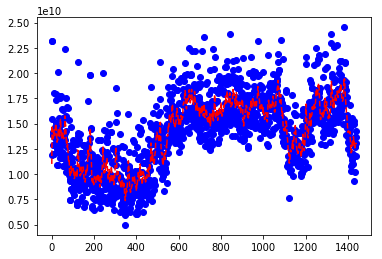

In [26]:


measurements = data.CPU
kf = KalmanFilter()
kf = kf.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

plt.figure(1)
times = range(measurements.shape[0])
plt.plot(times, measurements, 'bo',
         #times, measurements, 'ro',
         #times, smoothed_state_means, 'b--',
         times, smoothed_state_means, 'r--',)
plt.show()

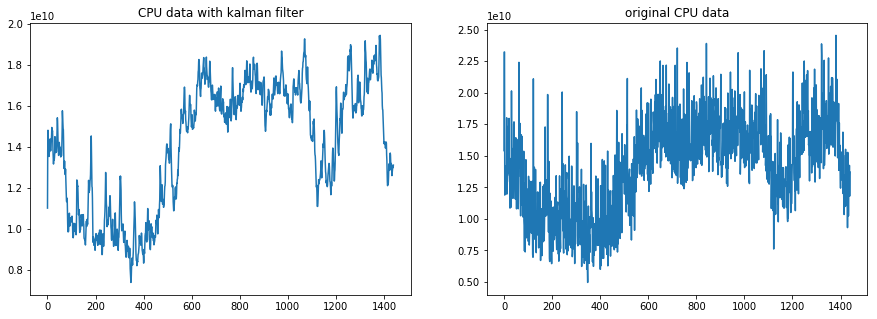

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(smoothed_state_means)
plt.title('CPU data with kalman filter')
plt.subplot(122)
plt.plot(data.CPU)
plt.title('original CPU data')
plt.show()

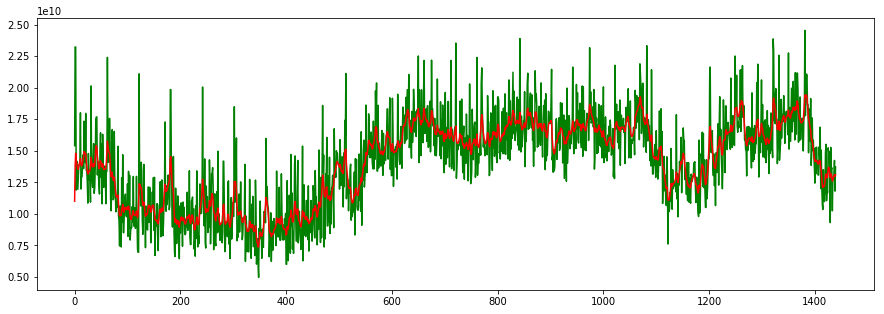

In [28]:
plt.figure(figsize=(15,5))
times = range(measurements.shape[0])
plt.plot(times, measurements, 'g-',
         #times, measurements, 'ro',
         #times, smoothed_state_means, 'b--',
         times, smoothed_state_means, 'r-',)
plt.show()